# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-03-25 03:05:12--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-03-25 03:05:13--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

In [6]:
data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head()

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480


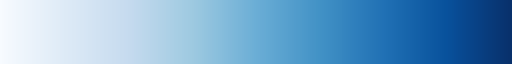

In [7]:
sns.color_palette("Blues", as_cmap=True)

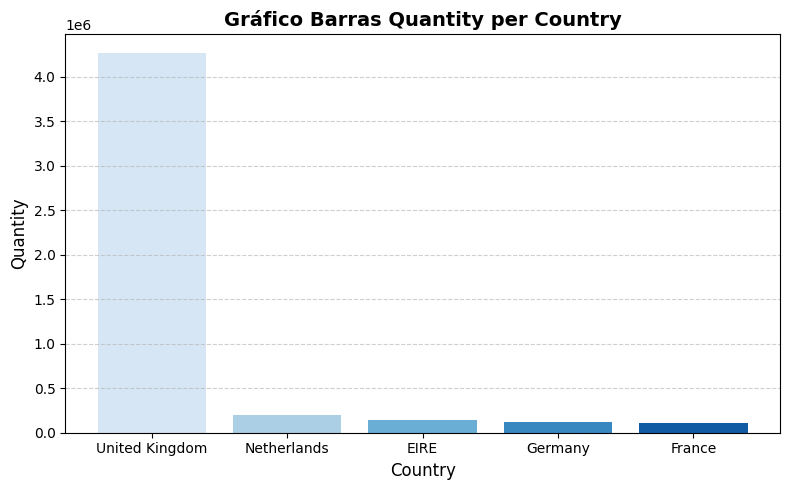

In [19]:
plt.figure(figsize=(8, 5))
barras=data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5)
palette = sns.color_palette("Blues", n_colors=len(barras))
plt.bar(barras.index,barras.values, color=palette)
plt.title('Gráfico Barras Quantity per Country', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [9]:
data.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False).head()

,UnitPrice
Country,
Singapore,109.645808
Hong Kong,42.505208
Portugal,8.582976
Cyprus,6.302363
Canada,6.030331


## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

In [10]:
data['StockCode'].value_counts().sort_values(ascending=False).head(10)

,count
StockCode,
85123A,2313
22423,2203
85099B,2159
47566,1727
20725,1639
84879,1502
22720,1477
22197,1476
21212,1385


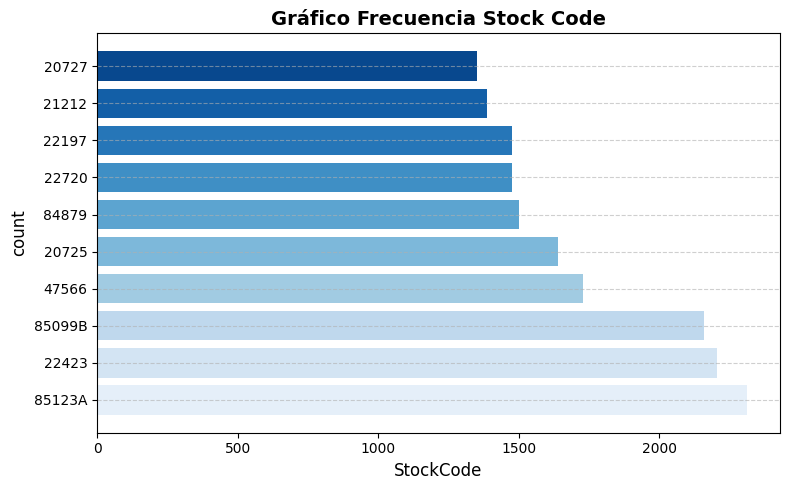

In [18]:
plt.figure(figsize=(8, 5))
barras=data['StockCode'].value_counts().sort_values(ascending=False).head(10)
palette = sns.color_palette("Blues", n_colors=len(barras))
plt.barh(barras.index,barras.values, color=palette)
plt.title('Gráfico Frecuencia Stock Code', fontsize=14, fontweight='bold')
plt.xlabel('StockCode', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

In [12]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data['TotalPrice']

,TotalPrice
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
...,...
541904,10.20
541905,12.60
541906,16.60
541907,16.60


In [13]:
data['TotalPrice'].head()

,TotalPrice
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


In [14]:
data.groupby('InvoiceNo')['TotalPrice'].sum().head().sort_values(ascending=False)

,TotalPrice
InvoiceNo,
536367,278.73
536365,139.12
536368,70.05
536366,22.20
536369,17.85


In [15]:
data.groupby('InvoiceNo')['TotalPrice'].sum().mean()

np.float64(376.3609240926641)

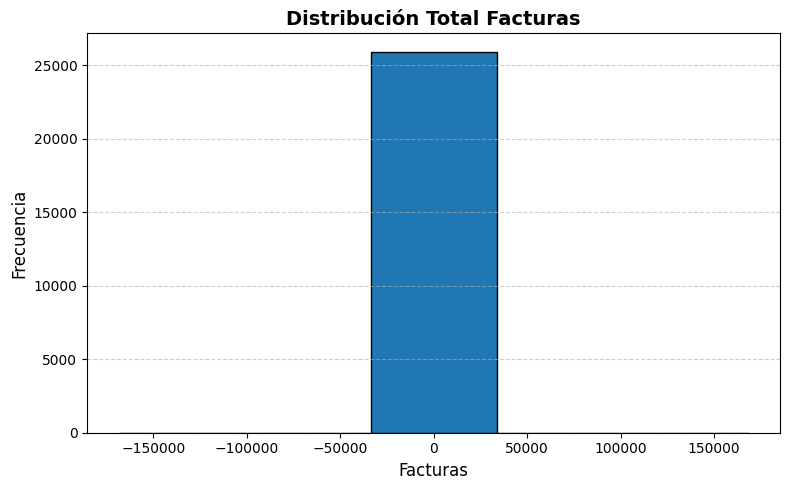

In [17]:
plt.figure(figsize=(8, 5))
barras=data.groupby('InvoiceNo')['TotalPrice'].sum()
plt.hist(barras.values, bins=5, edgecolor='black')
plt.title('Distribución Total Facturas', fontsize=14, fontweight='bold')
plt.xlabel('Facturas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

In [23]:
data.groupby('InvoiceDate')['TotalPrice'].sum().head()

,TotalPrice
InvoiceDate,
2010-12-01 08:26:00,139.12
2010-12-01 08:28:00,22.20
2010-12-01 08:34:00,348.78
2010-12-01 08:35:00,17.85
2010-12-01 08:45:00,855.86


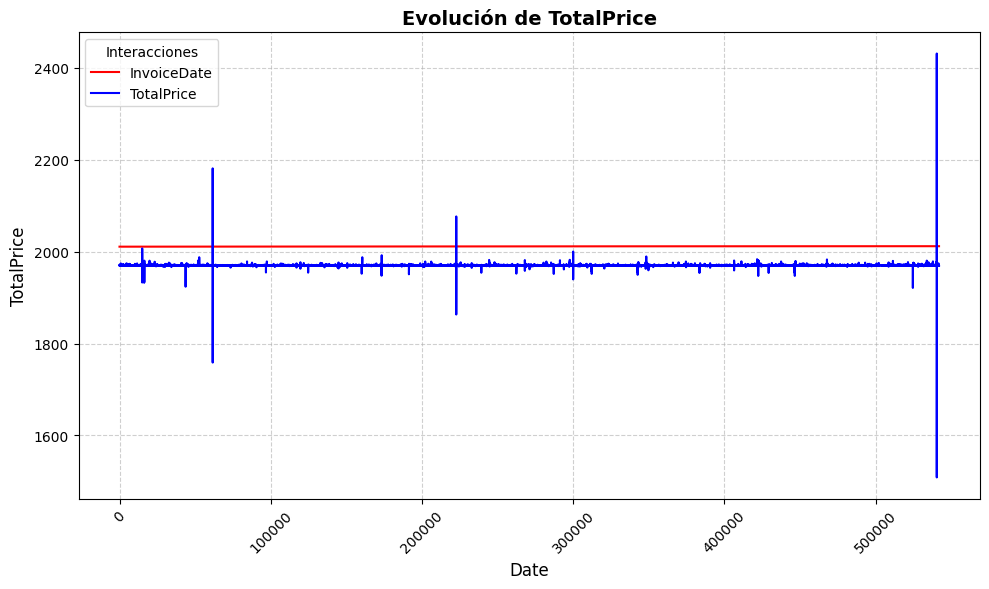

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['InvoiceDate'], color='red', label='InvoiceDate')
plt.plot(data.index, data['TotalPrice'], color='blue', label='TotalPrice')
plt.title('Evolución de TotalPrice', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('TotalPrice', fontsize=12)
plt.legend(title='Interacciones')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

In [27]:
data.groupby('Country')['UnitPrice'].sum().sort_values(ascending=False)

,UnitPrice
Country,
United Kingdom,2245715.474
EIRE,48447.190
France,43031.990
Germany,37666.000
Singapore,25108.890
Portugal,13037.540
Spain,12633.450
Hong Kong,12241.500
Belgium,7540.130


In [28]:
filtereddata=data[data['Country']!='United Kingdom']
filtereddata

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.00
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.20
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.60
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


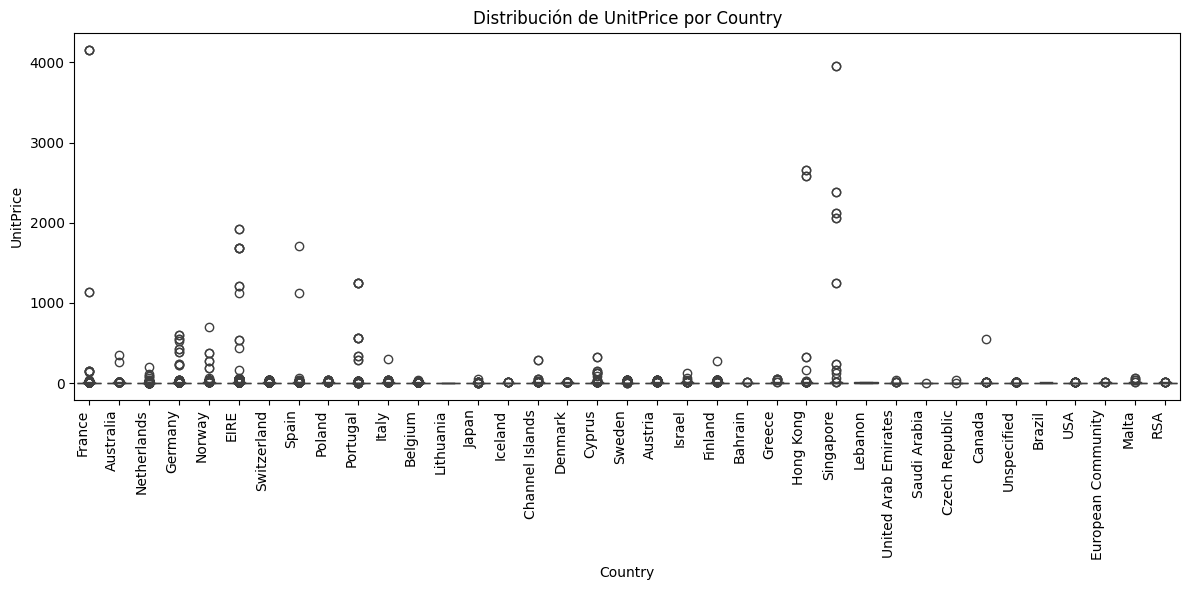

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='UnitPrice', data=filtereddata)
plt.title('Distribución de UnitPrice por Country')
plt.xlabel('Country')
plt.ylabel('UnitPrice')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [31]:
filtereddata2 = data[data['Country'].isin(['Poland','Japan','Denmark','Bahrain','Brazil'])]
filtereddata2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
6608,536971,21733,RED HANGING HEART T-LIGHT HOLDER,32,2010-12-03 13:40:00,2.55,12779.0,Poland,81.60
6609,536971,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2010-12-03 13:40:00,1.25,12779.0,Poland,30.00
6610,536971,37446,MINI CAKE STAND WITH HANGING CAKES,8,2010-12-03 13:40:00,1.45,12779.0,Poland,11.60
6611,536971,37448,CERAMIC CAKE DESIGN SPOTTED MUG,24,2010-12-03 13:40:00,1.49,12779.0,Poland,35.76
6612,536971,21700,BIG DOUGHNUT FRIDGE MAGNETS,24,2010-12-03 13:40:00,0.85,12779.0,Poland,20.40
...,...,...,...,...,...,...,...,...,...
530276,C580832,21731,RED TOADSTOOL LED NIGHT LIGHT,-2,2011-12-06 11:40:00,1.45,12753.0,Japan,-2.90
530277,C580832,23480,MINI LIGHTS WOODLAND MUSHROOMS,-15,2011-12-06 11:40:00,3.29,12753.0,Japan,-49.35
530278,C580832,22466,FAIRY TALE COTTAGE NIGHT LIGHT,-17,2011-12-06 11:40:00,1.65,12753.0,Japan,-28.05
530279,C580832,23084,RABBIT NIGHT LIGHT,-7,2011-12-06 11:40:00,1.79,12753.0,Japan,-12.53


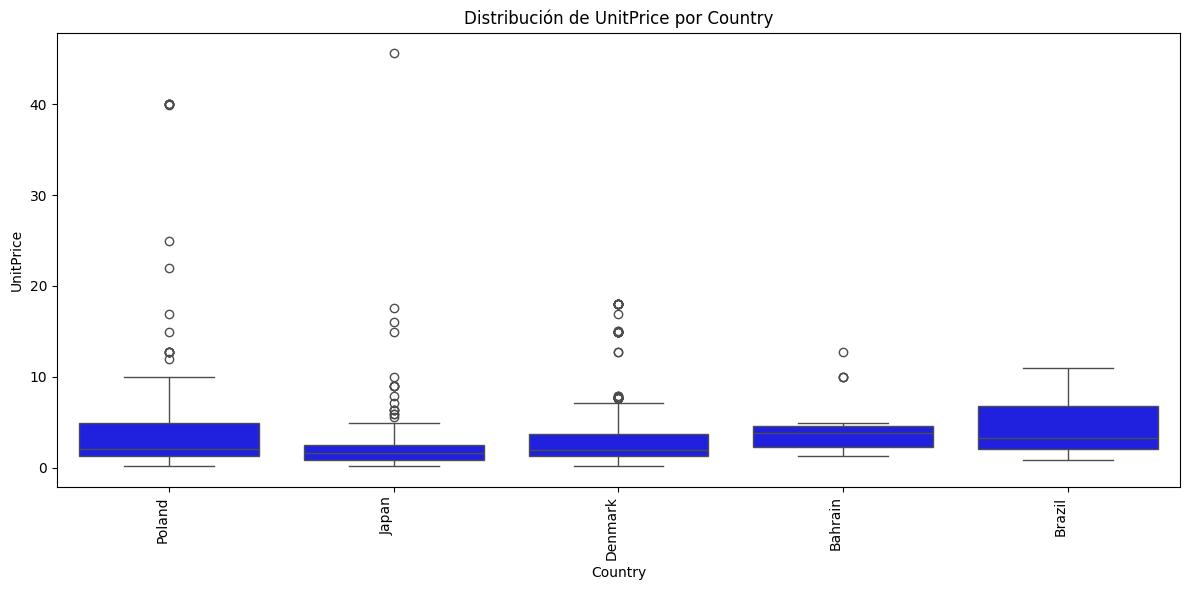

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='UnitPrice', data=filtereddata2, color="blue")
plt.title('Distribución de UnitPrice por Country')
plt.xlabel('Country')
plt.ylabel('UnitPrice')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

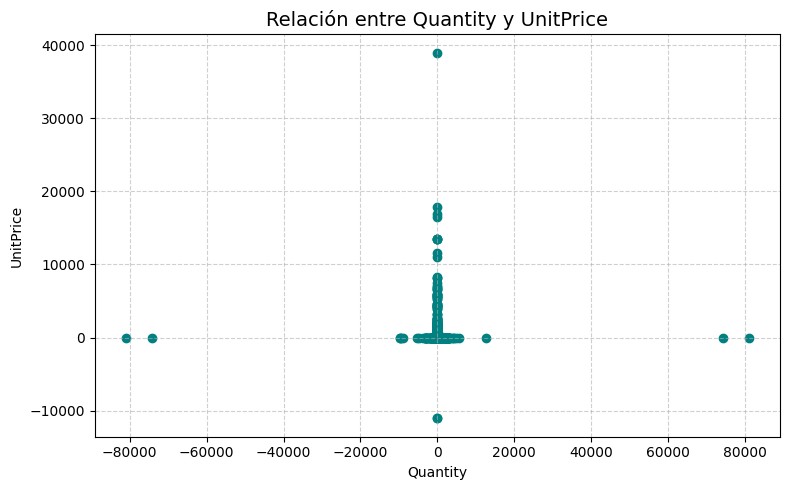

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Quantity'], data['UnitPrice'], color='teal')
plt.title('Relación entre Quantity y UnitPrice', fontsize=14)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

In [37]:
filtereddata2 = data[data['Country'].isin(['Poland','Japan','Denmark','Bahrain','Brazil'])]
filtereddata2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
6608,536971,21733,RED HANGING HEART T-LIGHT HOLDER,32,2010-12-03 13:40:00,2.55,12779.0,Poland,81.60
6609,536971,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2010-12-03 13:40:00,1.25,12779.0,Poland,30.00
6610,536971,37446,MINI CAKE STAND WITH HANGING CAKES,8,2010-12-03 13:40:00,1.45,12779.0,Poland,11.60
6611,536971,37448,CERAMIC CAKE DESIGN SPOTTED MUG,24,2010-12-03 13:40:00,1.49,12779.0,Poland,35.76
6612,536971,21700,BIG DOUGHNUT FRIDGE MAGNETS,24,2010-12-03 13:40:00,0.85,12779.0,Poland,20.40
...,...,...,...,...,...,...,...,...,...
530276,C580832,21731,RED TOADSTOOL LED NIGHT LIGHT,-2,2011-12-06 11:40:00,1.45,12753.0,Japan,-2.90
530277,C580832,23480,MINI LIGHTS WOODLAND MUSHROOMS,-15,2011-12-06 11:40:00,3.29,12753.0,Japan,-49.35
530278,C580832,22466,FAIRY TALE COTTAGE NIGHT LIGHT,-17,2011-12-06 11:40:00,1.65,12753.0,Japan,-28.05
530279,C580832,23084,RABBIT NIGHT LIGHT,-7,2011-12-06 11:40:00,1.79,12753.0,Japan,-12.53


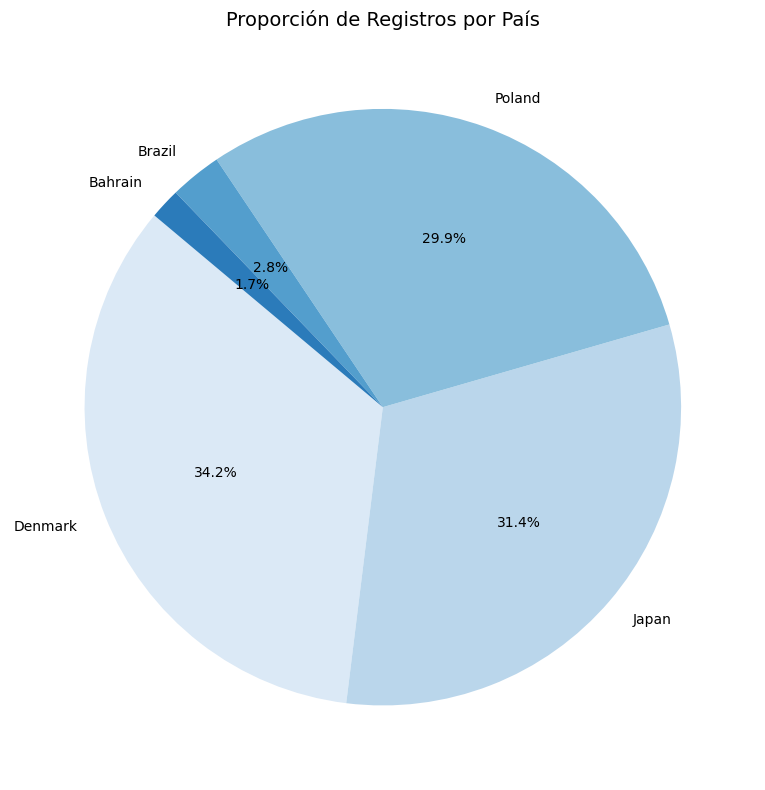

In [38]:
total=filtereddata2['Country'].value_counts()
total
plt.figure(figsize=(8, 8))
plt.pie(total, labels=total.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues"))
plt.title('Proporción de Registros por País', fontsize=14)
plt.tight_layout()
plt.show()

## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

In [39]:
data=data.reset_index(drop=True)
data.groupby('InvoiceDate')['UnitPrice'].mean()

,UnitPrice
InvoiceDate,
2010-12-01 08:26:00,3.910000
2010-12-01 08:28:00,1.850000
2010-12-01 08:34:00,4.833750
2010-12-01 08:35:00,5.950000
2010-12-01 08:45:00,2.764500
...,...
2011-12-09 12:23:00,1.650000
2011-12-09 12:25:00,1.285000
2011-12-09 12:31:00,1.799048


In [40]:
data['InvoiceMonth']=data['InvoiceDate'].dt.to_period('M')
data['InvoiceMonth']

,InvoiceMonth
0,2010-12
1,2010-12
2,2010-12
3,2010-12
4,2010-12
...,...
541904,2011-12
541905,2011-12
541906,2011-12
541907,2011-12


In [41]:
Mes=data.groupby('InvoiceMonth')['UnitPrice'].mean()
Mes

,UnitPrice
InvoiceMonth,
2010-12,6.132644
2011-01,4.915151
2011-02,4.599876
2011-03,4.666554
2011-04,4.317588
2011-05,5.149486
2011-06,5.443330
2011-07,4.350088
2011-08,4.262149


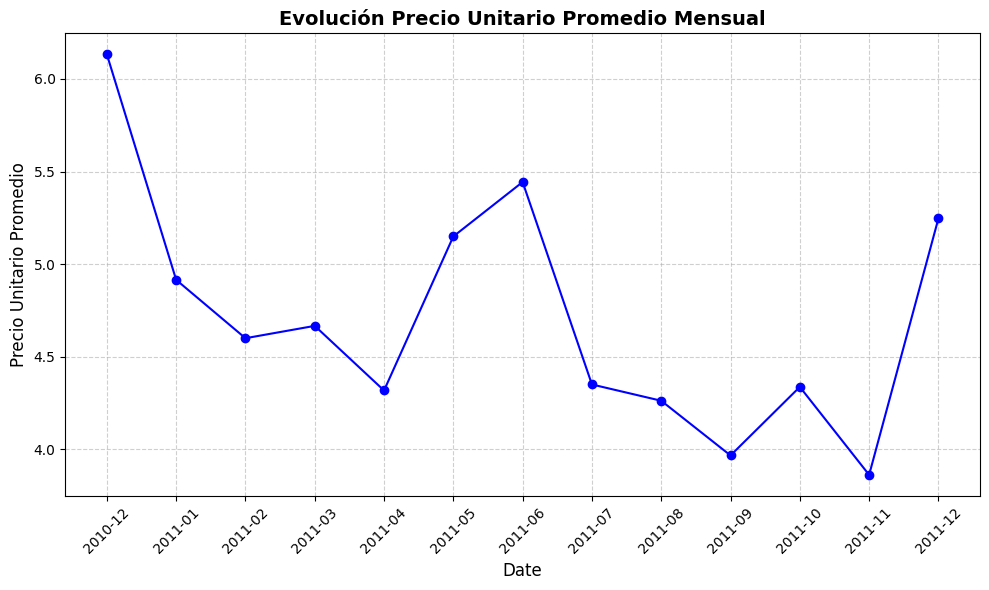

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(Mes.index.astype(str), Mes.values, color='blue', marker='o')
plt.title('Evolución Precio Unitario Promedio Mensual', fontsize=14,fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Precio Unitario Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

In [44]:
data['Description'].value_counts().sort_values(ascending=False)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
...,...
check?,1
SET 10 CARDS TRIANGLE ICONS 17220,1
SET 10 CARDS CHRISTMAS BAUBLE 16954,1


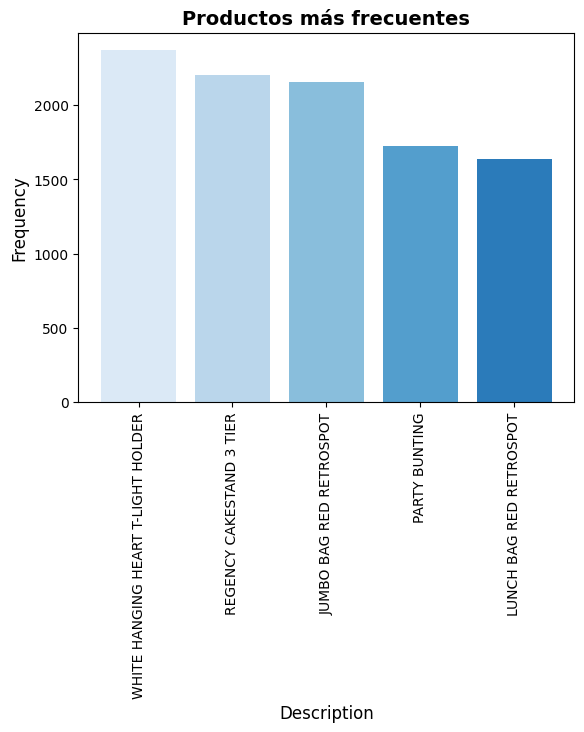

In [48]:
sns.color_palette("Blues", as_cmap=True)
barrasv=data['Description'].value_counts().sort_values(ascending=False).head(5)
plt.bar(barrasv.index,barrasv.values, color=sns.color_palette("Blues"))
plt.title('Productos más frecuentes', fontsize=14, fontweight='bold')
plt.xlabel('Description', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.